# Lab 7: Feature scaling and learning rate

In [28]:
import numpy as np
np.set_printoptions(precision=2)
import matplotlib.pyplot as plt

from ipynb.fs.full.lab6 import gradient_descent, squared_error_cost, slopes_of_tangents


## Load and view the dataset

In [61]:
# Training features: size (sqft), bedroom count, floor count, age
X_features = ['size(sqft)','bedrooms','floors','age']
X_train = np.array([[1.24e+03, 3.00e+00, 1.00e+00, 6.40e+01],
       [1.95e+03, 3.00e+00, 2.00e+00, 1.70e+01],
       [1.72e+03, 3.00e+00, 2.00e+00, 4.20e+01],
       [1.96e+03, 3.00e+00, 2.00e+00, 1.50e+01],
       [1.31e+03, 2.00e+00, 1.00e+00, 1.40e+01],
       [8.64e+02, 2.00e+00, 1.00e+00, 6.60e+01],
       [1.84e+03, 3.00e+00, 1.00e+00, 1.70e+01],
       [1.03e+03, 3.00e+00, 1.00e+00, 4.30e+01],
       [3.19e+03, 4.00e+00, 2.00e+00, 8.70e+01],
       [7.88e+02, 2.00e+00, 1.00e+00, 8.00e+01],
       [1.20e+03, 2.00e+00, 2.00e+00, 1.70e+01],
       [1.56e+03, 2.00e+00, 1.00e+00, 1.80e+01],
       [1.43e+03, 3.00e+00, 1.00e+00, 2.00e+01],
       [1.22e+03, 2.00e+00, 1.00e+00, 1.50e+01],
       [1.09e+03, 2.00e+00, 1.00e+00, 6.40e+01],
       [8.48e+02, 1.00e+00, 1.00e+00, 1.70e+01],
       [1.68e+03, 3.00e+00, 2.00e+00, 2.30e+01],
       [1.77e+03, 3.00e+00, 2.00e+00, 1.80e+01],
       [1.04e+03, 3.00e+00, 1.00e+00, 4.40e+01],
       [1.65e+03, 2.00e+00, 1.00e+00, 2.10e+01],
       [1.09e+03, 2.00e+00, 1.00e+00, 3.50e+01],
       [1.32e+03, 3.00e+00, 1.00e+00, 1.40e+01],
       [1.59e+03, 0.00e+00, 1.00e+00, 2.00e+01],
       [9.72e+02, 2.00e+00, 1.00e+00, 7.30e+01],
       [1.10e+03, 3.00e+00, 1.00e+00, 3.70e+01],
       [1.00e+03, 2.00e+00, 1.00e+00, 5.10e+01],
       [9.04e+02, 3.00e+00, 1.00e+00, 5.50e+01],
       [1.69e+03, 3.00e+00, 1.00e+00, 1.30e+01],
       [1.07e+03, 2.00e+00, 1.00e+00, 1.00e+02],
       [1.42e+03, 3.00e+00, 2.00e+00, 1.90e+01],
       [1.16e+03, 3.00e+00, 1.00e+00, 5.20e+01],
       [1.94e+03, 3.00e+00, 2.00e+00, 1.20e+01],
       [1.22e+03, 2.00e+00, 2.00e+00, 7.40e+01],
       [2.48e+03, 4.00e+00, 2.00e+00, 1.60e+01],
       [1.20e+03, 2.00e+00, 1.00e+00, 1.80e+01],
       [1.84e+03, 3.00e+00, 2.00e+00, 2.00e+01],
       [1.85e+03, 3.00e+00, 2.00e+00, 5.70e+01],
       [1.66e+03, 3.00e+00, 2.00e+00, 1.90e+01],
       [1.10e+03, 2.00e+00, 2.00e+00, 9.70e+01],
       [1.78e+03, 3.00e+00, 2.00e+00, 2.80e+01],
       [2.03e+03, 4.00e+00, 2.00e+00, 4.50e+01],
       [1.78e+03, 4.00e+00, 2.00e+00, 1.07e+02],
       [1.07e+03, 2.00e+00, 1.00e+00, 1.00e+02],
       [1.55e+03, 3.00e+00, 1.00e+00, 1.60e+01],
       [1.95e+03, 3.00e+00, 2.00e+00, 1.60e+01],
       [1.22e+03, 2.00e+00, 2.00e+00, 1.20e+01],
       [1.62e+03, 3.00e+00, 1.00e+00, 1.60e+01],
       [8.16e+02, 2.00e+00, 1.00e+00, 5.80e+01],
       [1.35e+03, 3.00e+00, 1.00e+00, 2.10e+01],
       [1.57e+03, 3.00e+00, 1.00e+00, 1.40e+01],
       [1.49e+03, 3.00e+00, 1.00e+00, 5.70e+01],
       [1.51e+03, 2.00e+00, 1.00e+00, 1.60e+01],
       [1.10e+03, 3.00e+00, 1.00e+00, 2.70e+01],
       [1.76e+03, 3.00e+00, 2.00e+00, 2.40e+01],
       [1.21e+03, 2.00e+00, 1.00e+00, 1.40e+01],
       [1.47e+03, 3.00e+00, 2.00e+00, 2.40e+01],
       [1.77e+03, 3.00e+00, 2.00e+00, 8.40e+01],
       [1.65e+03, 3.00e+00, 1.00e+00, 1.90e+01],
       [1.03e+03, 3.00e+00, 1.00e+00, 6.00e+01],
       [1.12e+03, 2.00e+00, 2.00e+00, 1.60e+01],
       [1.15e+03, 3.00e+00, 1.00e+00, 6.20e+01],
       [8.16e+02, 2.00e+00, 1.00e+00, 3.90e+01],
       [1.04e+03, 3.00e+00, 1.00e+00, 2.50e+01],
       [1.39e+03, 3.00e+00, 1.00e+00, 6.40e+01],
       [1.60e+03, 3.00e+00, 2.00e+00, 2.90e+01],
       [1.22e+03, 3.00e+00, 1.00e+00, 6.30e+01],
       [1.07e+03, 2.00e+00, 1.00e+00, 1.00e+02],
       [2.60e+03, 4.00e+00, 2.00e+00, 2.20e+01],
       [1.43e+03, 3.00e+00, 1.00e+00, 5.90e+01],
       [2.09e+03, 3.00e+00, 2.00e+00, 2.60e+01],
       [1.79e+03, 4.00e+00, 2.00e+00, 4.90e+01],
       [1.48e+03, 3.00e+00, 2.00e+00, 1.60e+01],
       [1.04e+03, 3.00e+00, 1.00e+00, 2.50e+01],
       [1.43e+03, 3.00e+00, 1.00e+00, 2.20e+01],
       [1.16e+03, 3.00e+00, 1.00e+00, 5.30e+01],
       [1.55e+03, 3.00e+00, 2.00e+00, 1.20e+01],
       [1.98e+03, 3.00e+00, 2.00e+00, 2.20e+01],
       [1.06e+03, 3.00e+00, 1.00e+00, 5.30e+01],
       [1.18e+03, 2.00e+00, 1.00e+00, 9.90e+01],
       [1.36e+03, 2.00e+00, 1.00e+00, 1.70e+01],
       [9.60e+02, 3.00e+00, 1.00e+00, 5.10e+01],
       [1.46e+03, 3.00e+00, 2.00e+00, 1.60e+01],
       [1.45e+03, 3.00e+00, 2.00e+00, 2.50e+01],
       [1.21e+03, 2.00e+00, 1.00e+00, 1.50e+01],
       [1.55e+03, 3.00e+00, 2.00e+00, 1.60e+01],
       [8.82e+02, 3.00e+00, 1.00e+00, 4.90e+01],
       [2.03e+03, 4.00e+00, 2.00e+00, 4.50e+01],
       [1.04e+03, 3.00e+00, 1.00e+00, 6.20e+01],
       [1.62e+03, 3.00e+00, 1.00e+00, 1.60e+01],
       [8.03e+02, 2.00e+00, 1.00e+00, 8.00e+01],
       [1.43e+03, 3.00e+00, 2.00e+00, 2.10e+01],
       [1.66e+03, 3.00e+00, 1.00e+00, 6.10e+01],
       [1.54e+03, 3.00e+00, 1.00e+00, 1.60e+01],
       [9.48e+02, 3.00e+00, 1.00e+00, 5.30e+01],
       [1.22e+03, 2.00e+00, 2.00e+00, 1.20e+01],
       [1.43e+03, 2.00e+00, 1.00e+00, 4.30e+01],
       [1.66e+03, 3.00e+00, 2.00e+00, 1.90e+01],
       [1.21e+03, 3.00e+00, 1.00e+00, 2.00e+01],
       [1.05e+03, 2.00e+00, 1.00e+00, 6.50e+01]])

# Training output: sale price (1000s USD)
y_train = np.array([300.  , 509.8 , 394.  , 540.  , 415.  , 230.  , 560.  , 294.  ,
       718.2 , 200.  , 302.  , 468.  , 374.2 , 388.  , 282.  , 311.8 ,
       401.  , 449.8 , 301.  , 502.  , 340.  , 400.28, 572.  , 264.  ,
       304.  , 298.  , 219.8 , 490.7 , 216.96, 368.2 , 280.  , 526.87,
       237.  , 562.43, 369.8 , 460.  , 374.  , 390.  , 158.  , 426.  ,
       390.  , 277.77, 216.96, 425.8 , 504.  , 329.  , 464.  , 220.  ,
       358.  , 478.  , 334.  , 426.98, 290.  , 463.  , 390.8 , 354.  ,
       350.  , 460.  , 237.  , 288.3 , 282.  , 249.  , 304.  , 332.  ,
       351.8 , 310.  , 216.96, 666.34, 330.  , 480.  , 330.3 , 348.  ,
       304.  , 384.  , 316.  , 430.4 , 450.  , 284.  , 275.  , 414.  ,
       258.  , 378.  , 350.  , 412.  , 373.  , 225.  , 390.  , 267.4 ,
       464.  , 174.  , 340.  , 430.  , 440.  , 216.  , 329.  , 388.  ,
       390.  , 356.  , 257.8 ])

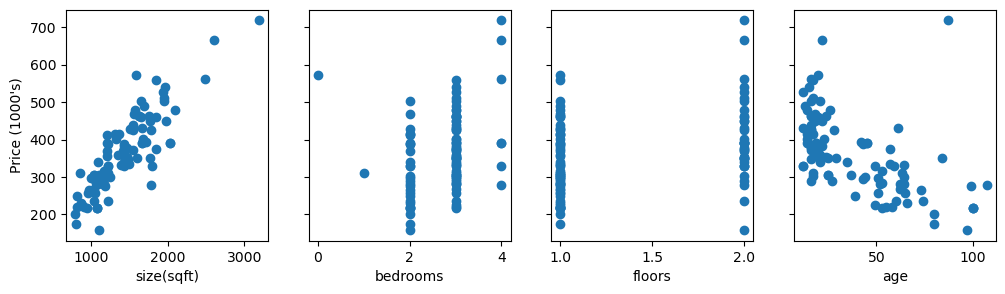

In [63]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

## Run gradient descent with adjusted alpha (learning rate)

NB: The below is not working as expected. The cost function converges here even when alpha is large. 
I don't have access to the cost function used in the course materials for this lab so I am using the cost function developed in the previous lab (lab 6). I suspect that this is why my results differ from the coursework.

In [95]:
# initialize parameters
w_init = np.array([ 5.5e-01, 1.0e-03, 5.1e-04, 1.2e-02])
initial_b = 3.6e-04
iterations = 10

In [99]:
# very high alpha
alpha = 9.9e-7

# run gradient descent 
print(f"\nRunning gradient descent...")
w_final, b_final, history_of_j = gradient_descent(X_train, y_train, initial_w, initial_b,
                                            squared_error_cost, slopes_of_tangents, alpha, iterations)

print(f"\nParameters refined by gradient descent... w: {w_final} b:{b_final:0.2f}, ")


Running gradient descent...
iteration    0: cost  2155.02
iteration    1: cost  1579.57
iteration    2: cost  1574.56
iteration    3: cost  1574.30
iteration    4: cost  1574.07
iteration    5: cost  1573.85
iteration    6: cost  1573.62
iteration    7: cost  1573.40
iteration    8: cost  1573.18
iteration    9: cost  1572.95

Parameters refined by gradient descent... w: [2.53e-01 4.31e-04 2.00e-04 2.64e-03] b:0.00, 


In [101]:
# mid alpha
alpha = 9e-7

# run gradient descent 
print(f"\nRunning gradient descent...")
w_final, b_final, history_of_j = gradient_descent(X_train, y_train, initial_w, initial_b,
                                            squared_error_cost, slopes_of_tangents, alpha, iterations)

print(f"\nParameters refined by gradient descent... w: {w_final} b:{b_final:0.2f}, ")


Running gradient descent...
iteration    0: cost  2155.02
iteration    1: cost  1579.57
iteration    2: cost  1574.56
iteration    3: cost  1574.30
iteration    4: cost  1574.07
iteration    5: cost  1573.85
iteration    6: cost  1573.62
iteration    7: cost  1573.40
iteration    8: cost  1573.18
iteration    9: cost  1572.95

Parameters refined by gradient descent... w: [2.53e-01 4.31e-04 2.00e-04 2.64e-03] b:0.00, 


In [134]:
# low alpha
alpha = 1e-7

# run gradient descent 
print(f"\nRunning gradient descent...")
w_raw, b_raw, history_of_j = gradient_descent(X_train, y_train, initial_w, initial_b,
                                            squared_error_cost, slopes_of_tangents, alpha, iterations)

print(f"\nParameters refined by gradient descent... w: {w_raw} b:{b_raw:0.2f}, ")


Running gradient descent...
iteration    0: cost  2155.02
iteration    1: cost  1579.57
iteration    2: cost  1574.56
iteration    3: cost  1574.30
iteration    4: cost  1574.07
iteration    5: cost  1573.85
iteration    6: cost  1573.62
iteration    7: cost  1573.40
iteration    8: cost  1573.18
iteration    9: cost  1572.95

Parameters refined by gradient descent... w: [2.53e-01 4.31e-04 2.00e-04 2.64e-03] b:0.00, 


## Feature Scaling using z-score

It's important to record the mean and standard deviation (that gets used to calculate the z-score) because you will need it to translate values later.

### Visualize transformation of input data

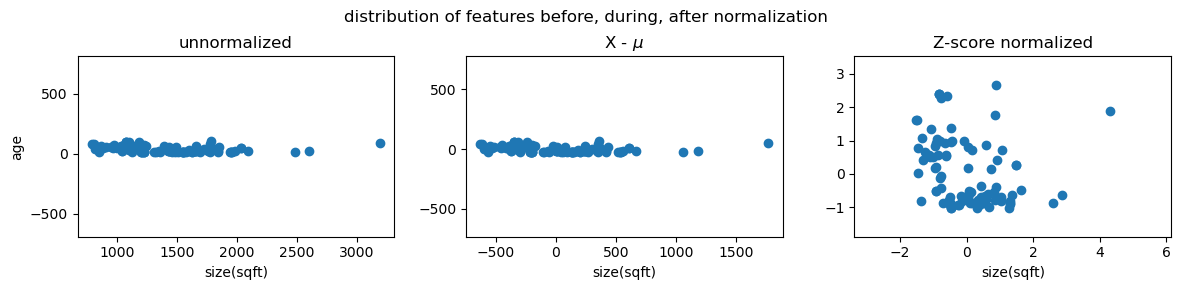

In [121]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

### Normalize the input data (using z-score)

In [124]:
def calculate_zscore_mean_deviation(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

In [128]:
# The peak to peak range of each column is reduced from a factor of thousands to a factor of 2-3 by normalization.
X_norm, X_mu, X_sigma = calculate_zscore_mean_deviation(X_train)

print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.42e+03 2.72e+00 1.38e+00 3.84e+01], 
X_sigma = [411.4    0.65   0.49  25.78]
Peak to Peak range by column in Raw        X:[2.4e+03 4.0e+00 1.0e+00 9.5e+01]
Peak to Peak range by column in Normalized X:[5.84 6.14 2.06 3.69]


## Rerun gradient descent with normalized inputs

In [136]:
iterations = 1000
alpha = 1.0e-1
w_norm, b_norm, history_of_j_norm = gradient_descent(X_norm, y_train, initial_w, initial_b,
                                            squared_error_cost, slopes_of_tangents, alpha, iterations)

iteration    0: cost 71369.04
iteration  100: cost 71361.77
iteration  200: cost 71354.51
iteration  300: cost 71347.24
iteration  400: cost 71339.98
iteration  500: cost 71332.71
iteration  600: cost 71325.45
iteration  700: cost 71318.19
iteration  800: cost 71310.93
iteration  900: cost 71303.67


### Predict target using normalized features

The graph demonstrates that something is definitely wrong with the gradient descent in this lab, but I can't debug without access to the library functions in the course.

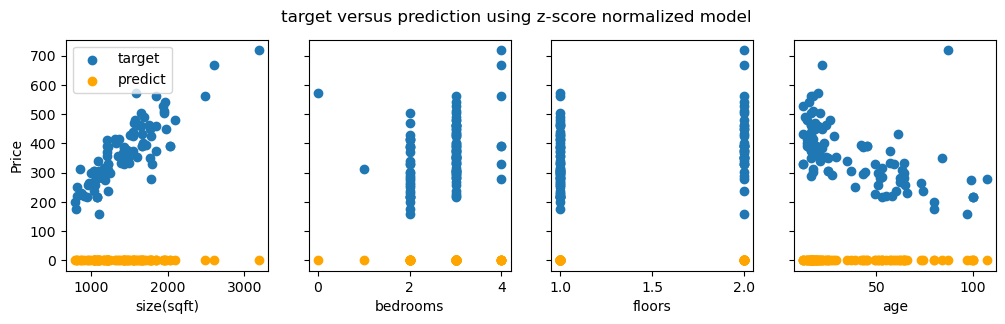

In [141]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [146]:
# First, normalize out example.
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)

# Then, make a prediction.
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.0f}")

[-0.53  0.43 -0.79  0.06]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $150
